In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import hashlib
from tqdm import tqdm

In [68]:
pd.set_option('display.max_columns', 32)

In [69]:
df_train = pd.read_csv("data/hakodate_train_data.csv", encoding="SHIFT_JIS", header=0, nrows=None)

In [70]:
# Generate targets for training (not using Result)
targets = []
for index, row in df_train.iterrows():
    result = row['result']
    target = (10 - result) / 45
    targets.append(target)
    
df_train['target'] = targets

In [71]:
# 名前をハッシュを使ってID化
name_ids = []
for index, row in df_train.iterrows():
    name = row['name']
    name_hash = hashlib.md5(name.encode()).hexdigest()
    name_id = name_hash[-8:]
    name_ids.append(name_id)
    
df_train['name_id'] = name_ids

In [72]:
for index, row in df_train.iterrows():
    if row['rank'] == 'SS':
        df_train.loc[index, 'rank'] = '0'
    elif row['rank'] == 'L1':
        df_train.loc[index, 'rank'] = '6'

In [73]:
# 出身地を地区毎にグループ化
localities = []
for index, row in df_train.iterrows():
    prefecture = row['prefecture']
    if prefecture in {'1', '2', '3', '5'}:
        locality = '1' #北東北
    elif prefecture in {'4', '6', '7'}:
        locality = '2' #南東北
    elif prefecture in {'8', '9'}:
        locality = '3' #茨栃
    elif prefecture in {'11', '13'}:
        locality = '4' #埼京
    elif prefecture in {'10', '15', '19', '20'}:
        locality = '5' #上信越
    elif prefecture in {'12', '14', '22'}:
        locality = '6' #南関東
    elif prefecture in {'16', '17', '21', '23', '24'}:
        locality = '7' #中部
    elif prefecture in {'18', '25', '26', '27', '28', '29', '30'}:
        locality = '8' #近畿
    elif prefecture in {'31', '32', '33', '34', '35'}:
        locality = '9' #中国
    elif prefecture in {'36', '37', '38', '39'}:
        locality = '10' #四国
    else:
        locality = '11' #九州
    
    localities.append(locality)

df_train['locality'] = localities

'''
('北海道', '1').('青森', '2').('岩手', '3').('宮城', '4')
('秋田', '5').('山形', '6').('福島', '7')
('茨城', '8').('栃木', '9').('群馬', '10').('埼玉', '11').('千葉', '12').
('東京', '13').('神奈川', '14').('新潟', '15').('富山', '16').('石川', '17').('福井', '18').
('山梨', '19').('長野', '20').('岐阜', '21').('静岡', '22').('愛知', '23').('三重', '24').
('滋賀', '25').('京都', '26').('大阪', '27').('兵庫', '28').('奈良', '29').('和歌山', '30').
('鳥取', '31').('島根', '32').('岡山', '33').('広島', '34').('山口', '35').('徳島', '36').
('香川', '37').('愛媛', '38').('高知', '39').('福岡', '40').('佐賀', '41').('長崎', '42').
('熊本', '43').('大分', '44').('宮崎', '45').('鹿児島', '46').('沖縄', '47')
'''

"\n('北海道', '1').('青森', '2').('岩手', '3').('宮城', '4')\n('秋田', '5').('山形', '6').('福島', '7')\n('茨城', '8').('栃木', '9').('群馬', '10').('埼玉', '11').('千葉', '12').\n('東京', '13').('神奈川', '14').('新潟', '15').('富山', '16').('石川', '17').('福井', '18').\n('山梨', '19').('長野', '20').('岐阜', '21').('静岡', '22').('愛知', '23').('三重', '24').\n('滋賀', '25').('京都', '26').('大阪', '27').('兵庫', '28').('奈良', '29').('和歌山', '30').\n('鳥取', '31').('島根', '32').('岡山', '33').('広島', '34').('山口', '35').('徳島', '36').\n('香川', '37').('愛媛', '38').('高知', '39').('福岡', '40').('佐賀', '41').('長崎', '42').\n('熊本', '43').('大分', '44').('宮崎', '45').('鹿児島', '46').('沖縄', '47')\n"

In [74]:
columns = list(df_train.columns)
columns.remove('name_id')
columns.insert(columns.index("name") + 1, "name_id")
columns.remove('locality')
columns.insert(columns.index("prefecture") + 1, "locality")
print(columns)

['date', 'place', 'race_num', 'predict', 'koukiai', 'evaluation', 'bracket', 'car_num', 'name', 'name_id', 'prefecture', 'locality', 'age', 'period', 'rank', 'leg', 'gear', 'racing piont', 'S', 'B', 'Nige', 'Maki', 'Sashi', 'Ma', '1st', '2nd', '3rd', 'Chakugai', 'win', '2ren', '3ren', 'result', 'target']


In [75]:
df_train = df_train.loc[:,columns]
display(df_train)

,date,place,race_num,predict,koukiai,evaluation,bracket,car_num,name,name_id,prefecture,locality,age,period,rank,leg,...,racing piont,S,B,Nige,Maki,Sashi,Ma,1st,2nd,3rd,Chakugai,win,2ren,3ren,result,target
0,20120420,hakodate,1,NaN,NaN,NaN,1,1,須永 優太,0078fe97,7,2,23,94,3,2,...,88.63,3,5,0,4,2,0,4,2,2,13,19.0,28.5,38.0,1,0.200000
1,20120420,hakodate,1,NaN,NaN,NaN,2,2,木村 健司,7d2456c3,11,4,35,85,3,3,...,85.66,2,0,0,0,2,3,0,5,3,19,0.0,18.5,29.6,7,0.066667
2,20120420,hakodate,1,NaN,NaN,NaN,3,3,鈴木 純,98d892d9,14,6,39,73,2,3,...,83.26,0,0,0,0,1,2,1,2,6,21,3.3,10.0,30.0,4,0.133333
3,20120420,hakodate,1,NaN,NaN,NaN,4,4,岡田 富夫,1084c903,4,2,58,39,2,3,...,79.20,1,0,0,0,3,1,2,2,1,19,8.3,16.6,20.8,5,0.111111
4,20120420,hakodate,1,NaN,NaN,NaN,4,5,與那嶺 盛安,2e7d486d,13,4,40,76,3,1,...,89.36,1,0,0,4,4,1,7,2,3,13,28.0,36.0,48.0,6,0.088889
5,20120420,hakodate,1,NaN,NaN,NaN,5,6,齊藤 直伸,fa1cda4b,22,6,35,81,2,2,...,78.03,2,21,2,0,0,0,0,2,4,21,0.0,7.4,22.2,9,0.022222
6,20120420,hakodate,1,NaN,NaN,NaN,5,7,大竹 洋,b2b4fed0,7,2,48,51,2,3,...,86.07,5,0,0,0,2,2,1,3,5,19,3.5,14.2,32.1,2,0.177778
7,20120420,hakodate,1,NaN,NaN,NaN,6,8,福原 義則,9a9c0934,10,5,46,55,2,3,...,78.04,0,0,0,0,0,1,0,1,2,22,0.0,4.0,12.0,8,0.044444
8,20120420,hakodate,1,NaN,NaN,NaN,6,9,高地 祐一,eb78cc80,14,6,44,61,3,3,...,84.30,1,0,0,0,2,1,1,2,3,18,4.1,12.5,25.0,3,0.155556
9,20120420,hakodate,2,NaN,NaN,NaN,1,1,鶴岡 孝之,3ffbdaa1,12,6,38,77,3,3,...,83.33,4,0,0,0,0,2,0,2,5,17,0.0,8.3,29.1,4,0.133333


In [76]:
iters_num = 100
batch_size = 32
plot_interval = 1

x = tf.placeholder(tf.float32, [None, 9 * len(X_columns)])
d = tf.placeholder(tf.float32, [None, 9])
W = tf.Variable(tf.random_normal([9 * len(X_columns), 9], stddev=0.01))
b = tf.Variable(tf.zeros([9]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# 交差エントロピー
cross_entropy = -tf.reduce_sum(d * tf.log(y), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 正誤を保存
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [77]:
X_columns = ['locality', 'age', 'rank', 'leg', 'racing piont', 'S', 'B', 'Nige', 'Maki', 'Sashi', 'Ma', '1st', '2nd', '3rd', 'Chakugai', 'win', '2ren', '3ren']

In [78]:
X = []
target = []
grouped = df_train.groupby(['date', 'place', 'race_num'])
for race_name, group in tqdm(grouped):
    #print(race_name)
    racer_count = group.shape[0]
    if racer_count != 9:
        continue

    X.append(group[X_columns].values)
    target.append(group['target'].values)

X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
d_y = np.array(target)

X_train, X_test = train_test_split(X, test_size = 0.1)
d_train, d_test = train_test_split(d_y, test_size = 0.1)

print(X_train.shape, X_test.shape)
print(d_train.shape, d_test.shape)



100%|████████████████████████████████████████████████████████████████████████████| 3845/3845 [00:01<00:00, 2150.30it/s]


(2311, 162) (257, 162)
(2311, 9) (257, 9)


(32, 162) (32, 9)
Generation: 1. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 2. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 3. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 4. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 5. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 6. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 7. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 8. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 9. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 10. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 11. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 12. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 13. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 14. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 15. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 16. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 17. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 18. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 19. 正解率 = 0.25291827
(32, 162) (32, 9)
Generation: 20. 正解率 = 

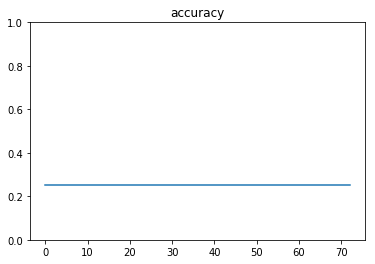

In [82]:
accuracies = []
plot_num = 0
for i in range(iters_num):
    if batch_size * i > X_train.shape[0]:
        break

    X_batch = X_train[batch_size * i:batch_size * (i+1), :]
    d_batch = d_train[batch_size * i:batch_size * (i+1), :]
    print(X_batch.shape, d_batch.shape)
    sess.run(train, feed_dict={x: X_batch, d: d_batch})
    if (i*1) % plot_interval == 0:
        #print(sess.run(correct, feed_dict={x: X_test, d: d_test}))
        accuracy_val = sess.run(accuracy, feed_dict={x: X_test, d: d_test})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))

    plot_num += 1
        
lists = range(0, plot_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()        